In [ ]:
# Importing libary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Before we get started on this module we will take a look at few key features that are required when we perform 'Portfolio Analysis'.
### $ Statistical$  $Features $
    * Mean, Variance, Co-variance, Std Deviation etc
    * Sample & population

Portfolio Analysis basically means we will look at a few stocks and compare their returns on various factors.

    * Portfolio Expected returns: It is simply calulcated using weighted mean by the asset
    * Portfolio Risk: Measued using portfolio standard deviation

    

In [3]:
df = pd.DataFrame(
    {'A':[1,5,3],
     'B':[1,6,5]}
)

In [4]:
df

,A,B
0,1,1
1,5,6
2,3,5


In [ ]:
# mean
df.mean()

A    3.0
B    4.0
dtype: float64

In [ ]:
# co-variance
df.cov()

,A,B
A,4.0,5.0
B,5.0,7.0


We will use algebra to make the calculation easier

### Dot product

In [13]:
# Weight Vector
W = np.ones(len(df.columns))/len(df.columns)
W

array([0.5, 0.5])

In [10]:
W.dot(df.mean())

3.5

In [ ]:
# portfolio variance
W.dot(df.cov().dot(W))

5.25

### Let's compare the stocks now

In [15]:
import yfinance as yf

In [34]:
df = yf.download(['MSFT', 'KO', 'TSLA'], start='2017-01-01', auto_adjust=False)['Adj Close']

## We are only working with Adjust close range to make things easier
df.head()

[*********************100%***********************]  3 of 3 completed


Ticker,KO,MSFT,TSLA
Date,,,
2017-01-03,32.210194,56.601135,14.466000
2017-01-04,32.094612,56.347874,15.132667
2017-01-05,32.171665,56.347874,15.116667
2017-01-06,32.163971,56.836288,15.267333
2017-01-09,31.840321,56.655407,15.418667


Further we are only going to be working with returns for making results easier to understand

In [35]:
ret_df = df.pct_change()
ret_df.dropna(inplace=True)

In [36]:
(ret_df+1).cumprod() -1

Ticker,KO,MSFT,TSLA
Date,,,
2017-01-04,-0.003588,-0.004474,0.046085
2017-01-05,-0.001196,-0.004474,0.044979
2017-01-06,-0.001435,0.004155,0.055394
2017-01-09,-0.011483,0.000959,0.065856
2017-01-10,-0.018182,0.000639,0.059358
...,...,...,...
2025-03-28,1.184712,5.692445,17.218581
2025-03-31,1.223520,5.632199,16.915112
2025-04-01,1.231281,5.752338,17.557998


<Axes: xlabel='Date'>

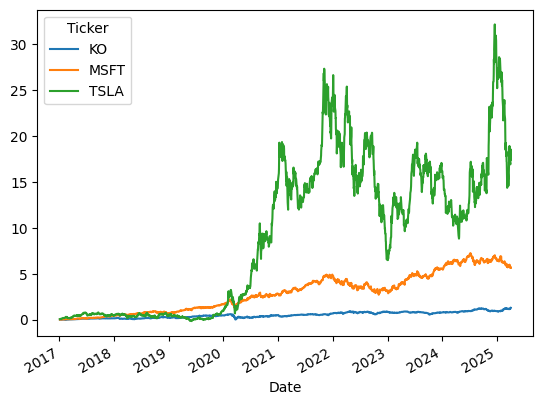

In [37]:
ret_plot = ((ret_df+1).cumprod() -1)
ret_plot.plot(kind='line')

As we can see the Tesla stock took over both Coca-Cola and Microsoft by a hefty margin.
* Tesla's stock rose by 1744%
* Microsoft stock rose by 563%
* While Coca-Cola's stock rose by only 127%

Let's take look at the other common statistics

In [38]:
# Mean
ret_df.mean()

Ticker
KO      0.000466
MSFT    0.001062
TSLA    0.002148
dtype: float64

In [39]:
# Std Deviation
ret_df.std()

Ticker
KO      0.011740
MSFT    0.017304
TSLA    0.038610
dtype: float64

In [40]:
# Covariance matrix
ret_df.cov()

Ticker,KO,MSFT,TSLA
Ticker,,,
KO,0.000138,0.000076,0.000060
MSFT,0.000076,0.000299,0.000280
TSLA,0.000060,0.000280,0.001491


We see there is positive direct relationship between the stocks. To find out the relationship strength we will use correlation matrix next.

In [41]:
ret_df.corr()

Ticker,KO,MSFT,TSLA
Ticker,,,
KO,1.000000,0.372725,0.131705
MSFT,0.372725,1.000000,0.419737
TSLA,0.131705,0.419737,1.000000


We see Coca-Cola has weak correlation with both Microsoft and Tesla

In [44]:
# Setting up the portfolio return
W = (np.ones(len(ret_df.columns))/len(ret_df.columns))
W

array([0.33333333, 0.33333333, 0.33333333])

In [47]:
# Expected return
pf_exp = W.dot(ret_df.mean())
pf_exp

0.0012254734803665407

In [48]:
# pf std devitaion
pf_std = (W.dot(ret_df.cov().dot(W))**(1/2))
pf_std

0.017510974324592997

Now lets compare the pf expected returns and pf expected risk expected returns with the portfolio returns

In [49]:
ret_df.mean()

Ticker
KO      0.000466
MSFT    0.001062
TSLA    0.002148
dtype: float64

In [50]:
ret_df.std()

Ticker
KO      0.011740
MSFT    0.017304
TSLA    0.038610
dtype: float64

### Sharpe Ratio:

Sharpe ratio simply means the expected returns based on the risk you're willing to take. The higher the value the better results on the portfolio.

In [53]:
# Sharpe ratio of the portfolio
(pf_exp/pf_std)

0.06998316927719121

In [54]:
# Sharpe ratios of the componenets
ret_df.mean()/ret_df.std()

Ticker
KO      0.039671
MSFT    0.061396
TSLA    0.055640
dtype: float64

In [55]:
ret_df.mean(axis=1)

Date
2017-01-04    0.012674
2017-01-05    0.000448
2017-01-06    0.006132
2017-01-09   -0.001111
2017-01-10   -0.004398
                ...   
2025-03-28   -0.023489
2025-03-31   -0.002632
2025-04-01    0.019163
2025-04-02    0.015207
2025-04-03   -0.015587
Length: 2074, dtype: float64

In [57]:
# Accumulate returns
(ret_df.mean(axis=1)+1).cumprod() -1

Date
2017-01-04    0.012674
2017-01-05    0.013128
2017-01-06    0.019340
2017-01-09    0.018208
2017-01-10    0.013730
                ...   
2025-03-28    8.076826
2025-03-31    8.052936
2025-04-01    8.226421
2025-04-02    8.366732
2025-04-03    8.220728
Length: 2074, dtype: float64

This suggests if we had invested in the portfolio for these stocks we would have made a profit of 822%. Next, let;s plot this.

<Axes: xlabel='Date'>

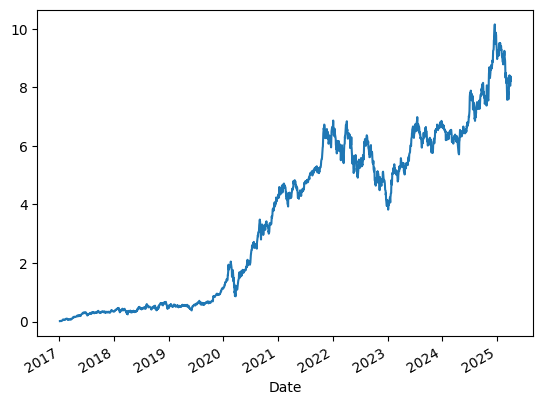

In [59]:
((ret_df.mean(axis=1)+1).cumprod() -1).plot(kind='line')